In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('precision',4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importar Bases

In [3]:
import os.path
def path_base(base_name,folder):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    print(current_dir)
    data_dir = current_dir.replace('notebook',folder)
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [4]:
base = pd.read_csv(path_base('db_ml_order_items_ontime_q2.csv','data'))

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\data
C:\MyGit\databricks_projetofinal_fia\data\db_ml_order_items_ontime_q2.csv


In [5]:
base.head(3)

,order_id,order_item_id,customer_id,seller_id,customer_unique_id,order_status,order_date,order_dow,order_yyyymm,order_h,days_estimated_dlv,days_limit_ship,price,freight_value,seller_region,customer_region,is_samestate,product_id,product_category_name,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,is_voucher,is_bankslip,is_cc,is_dc,total_outtime_seller,qty_review_low_4_seller,total_not_delivered_seller,total_canceled_seller,revenue_semester_seller,qty_customers_seller,days_first_order_item_seller,is_new_seller,distinct_category_seller,target
0,d6021b689d20a82e885a61d75888df6a,1,e811ef51626307094e57cf8d443dd4fb,0e982cff76cc0579f632cea8a0e38c9d,5a6012519d0cf9a2103bd2170a81b833,delivered,2018-04-03T07:28:21.000Z,3,201804,0-7,22,6,109.000,18.640,S,SP,0,4f9172df8e9ae60aa90c14fb36afbcbb,presentes,214.000,1.000,1450,8184,0,0,1,0,5,0,5,0,847.340,5,187,0,1,1
1,d6021b689d20a82e885a61d75888df6a,2,e811ef51626307094e57cf8d443dd4fb,0e982cff76cc0579f632cea8a0e38c9d,5a6012519d0cf9a2103bd2170a81b833,delivered,2018-04-03T07:28:21.000Z,3,201804,0-7,22,6,109.000,18.640,S,SP,0,4f9172df8e9ae60aa90c14fb36afbcbb,presentes,214.000,1.000,1450,8184,0,0,1,0,5,0,5,0,847.340,5,187,0,1,1
2,36b1f4e20647a8599217e502c9ed45e0,2,3bd9cab16ac6be6b2cf08859994a06e3,0e982cff76cc0579f632cea8a0e38c9d,3baae02c3b608a48d1dfbb678fe30d3a,delivered,2018-04-02T19:44:20.000Z,2,201804,18-23,10,4,37.380,8.650,S,S,1,6d7bc0518cc2406af3d486526806d50e,presentes,184.000,1.000,383,3430,0,0,1,0,5,0,5,0,847.340,5,187,0,1,1


In [6]:
base.dtypes

order_id                         object
order_item_id                     int64
customer_id                      object
seller_id                        object
customer_unique_id               object
order_status                     object
order_date                       object
order_dow                         int64
order_yyyymm                      int64
order_h                          object
days_estimated_dlv                int64
days_limit_ship                   int64
price                           float64
freight_value                   float64
seller_region                    object
customer_region                  object
is_samestate                      int64
product_id                       object
product_category_name            object
product_description_lenght      float64
product_photos_qty              float64
product_weight_g                  int64
product_volume_cm3                int64
is_voucher                        int64
is_bankslip                       int64


In [7]:
base.nunique()

order_id                        19947
order_item_id                      13
customer_id                     19947
seller_id                        1680
customer_unique_id              19685
order_status                        5
order_date                      19854
order_dow                           7
order_yyyymm                        3
order_h                             5
days_estimated_dlv                 63
days_limit_ship                    38
price                            2518
freight_value                    3872
seller_region                       5
customer_region                     6
is_samestate                        2
product_id                       9663
product_category_name              17
product_description_lenght       2114
product_photos_qty                 14
product_weight_g                 1263
product_volume_cm3               2445
is_voucher                          2
is_bankslip                         2
is_cc                               2
is_dc       

In [8]:
base.isnull().sum()

order_id                          0
order_item_id                     0
customer_id                       0
seller_id                         0
customer_unique_id                0
order_status                      0
order_date                        0
order_dow                         0
order_yyyymm                      0
order_h                           0
days_estimated_dlv                0
days_limit_ship                   0
price                             0
freight_value                     0
seller_region                     0
customer_region                   0
is_samestate                      0
product_id                        0
product_category_name             0
product_description_lenght      142
product_photos_qty              142
product_weight_g                  0
product_volume_cm3                0
is_voucher                        0
is_bankslip                       0
is_cc                             0
is_dc                             0
total_outtime_seller        

In [9]:
base.product_description_lenght = base.product_description_lenght.fillna(base.product_description_lenght.mean())
base.product_photos_qty = base.product_photos_qty.fillna(base.product_photos_qty.mean())
base.isnull().sum()

order_id                        0
order_item_id                   0
customer_id                     0
seller_id                       0
customer_unique_id              0
order_status                    0
order_date                      0
order_dow                       0
order_yyyymm                    0
order_h                         0
days_estimated_dlv              0
days_limit_ship                 0
price                           0
freight_value                   0
seller_region                   0
customer_region                 0
is_samestate                    0
product_id                      0
product_category_name           0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_volume_cm3              0
is_voucher                      0
is_bankslip                     0
is_cc                           0
is_dc                           0
total_outtime_seller            0
qty_review_low_4_seller         0
total_not_deli

In [10]:
dados = base[['order_dow',
            'order_h',
            'days_estimated_dlv',
            'days_limit_ship',
            'price',
            'freight_value',
            'seller_region',
            'customer_region',
            'is_samestate',
            'product_category_name',
            'product_description_lenght',
            'product_photos_qty',
            'product_weight_g',
            'product_volume_cm3',
            'is_voucher',
            'is_bankslip',
            'is_cc',
            'is_dc',
            'total_outtime_seller',
            'qty_review_low_4_seller',
            'total_not_delivered_seller',
            'total_canceled_seller',
            'revenue_semester_seller',
            'qty_customers_seller',
            'days_first_order_item_seller',
            'is_new_seller',
            'distinct_category_seller',
            'target']]

# Criar dummies para var categoricas

In [11]:
base_categoricas = ['order_dow',
                    'order_h',
                    'seller_region',
                    'customer_region',
                    #'is_samestate',
                    'product_category_name',
                    #'is_voucher',
                    #'is_bankslip',
                    #'is_cc',
                    #'is_dc',
                    #'is_new_seller'
                   ]
dum = pd.get_dummies(dados,
                    columns=base_categoricas,
                    drop_first=True,
                    prefix=base_categoricas,
                     prefix_sep='_'
                    )

In [12]:
dum.head(3)

,days_estimated_dlv,days_limit_ship,price,freight_value,is_samestate,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,is_voucher,is_bankslip,is_cc,is_dc,total_outtime_seller,qty_review_low_4_seller,total_not_delivered_seller,total_canceled_seller,revenue_semester_seller,qty_customers_seller,days_first_order_item_seller,is_new_seller,distinct_category_seller,target,order_dow_2,order_dow_3,order_dow_4,order_dow_5,order_dow_6,order_dow_7,order_h_12-15,order_h_16-17,order_h_18-23,order_h_8-11,seller_region_Ne,seller_region_S,seller_region_SP,seller_region_Se,customer_region_N,customer_region_Ne,customer_region_S,customer_region_SP,customer_region_Se,product_category_name_automotivo,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_eletro,product_category_name_escritorio,product_category_name_esporte_lazer,product_category_name_fashion,product_category_name_home,product_category_name_informatica,product_category_name_livros_papelaria,product_category_name_ni,product_category_name_pet_shop,product_category_name_preentes,product_category_name_presentes,product_category_name_servico,product_category_name_telefonia
0,22,6,109.000,18.640,0,214.000,1.000,1450,8184,0,0,1,0,5,0,5,0,847.340,5,187,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,6,109.000,18.640,0,214.000,1.000,1450,8184,0,0,1,0,5,0,5,0,847.340,5,187,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,4,37.380,8.650,1,184.000,1.000,383,3430,0,0,1,0,5,0,5,0,847.340,5,187,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
dum.columns

Index(['days_estimated_dlv', 'days_limit_ship', 'price', 'freight_value', 'is_samestate', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_volume_cm3', 'is_voucher', 'is_bankslip', 'is_cc', 'is_dc', 'total_outtime_seller', 'qty_review_low_4_seller', 'total_not_delivered_seller', 'total_canceled_seller', 'revenue_semester_seller', 'qty_customers_seller', 'days_first_order_item_seller', 'is_new_seller', 'distinct_category_seller', 'target', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_dow_7', 'order_h_12-15', 'order_h_16-17', 'order_h_18-23', 'order_h_8-11', 'seller_region_Ne', 'seller_region_S', 'seller_region_SP', 'seller_region_Se', 'customer_region_N', 'customer_region_Ne', 'customer_region_S', 'customer_region_SP', 'customer_region_Se', 'product_category_name_automotivo', 'product_category_name_bebes', 'product_category_name_beleza_saude', 'product_category_name_eletro', 'product_category_name_escritorio',
       '

In [14]:
dados_selecionados = dum[['days_estimated_dlv', 'days_limit_ship', 'price', 'freight_value', 'is_samestate', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_volume_cm3', 'is_voucher', 'is_bankslip', 'is_cc', 'is_dc', 'total_outtime_seller', 'qty_review_low_4_seller', 'total_not_delivered_seller', 'total_canceled_seller', 'revenue_semester_seller', 'qty_customers_seller', 'days_first_order_item_seller', 'is_new_seller', 'distinct_category_seller', 'target', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_dow_7', 'order_h_12-15', 'order_h_16-17', 'order_h_18-23', 'order_h_8-11', 'seller_region_Ne', 'seller_region_S', 'seller_region_SP', 'seller_region_Se', 'customer_region_N', 'customer_region_Ne', 'customer_region_S', 'customer_region_SP', 'customer_region_Se', 'product_category_name_automotivo', 'product_category_name_bebes', 'product_category_name_beleza_saude', 'product_category_name_eletro', 'product_category_name_escritorio',
       'product_category_name_esporte_lazer', 'product_category_name_fashion', 'product_category_name_home', 'product_category_name_informatica', 'product_category_name_livros_papelaria', 'product_category_name_ni', 'product_category_name_pet_shop', 'product_category_name_preentes', 'product_category_name_presentes', 'product_category_name_servico', 'product_category_name_telefonia']]

In [15]:
dados_selecionados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
days_estimated_dlv,22978.000,25.324,9.326,8.000,19.000,25.000,31.000,83.000
days_limit_ship,22978.000,6.425,3.104,2.000,4.000,6.000,8.000,51.000
price,22978.000,124.392,191.370,0.850,39.990,79.000,135.000,4590.000
freight_value,22978.000,20.623,17.639,0.000,12.790,17.930,22.770,409.680
is_samestate,22978.000,0.398,0.489,0.000,0.000,0.000,1.000,1.000
product_description_lenght,22978.000,816.603,651.470,4.000,368.000,638.000,1007.000,3956.000
product_photos_qty,22978.000,2.223,1.714,1.000,1.000,1.000,3.000,19.000
product_weight_g,22978.000,2079.287,3634.769,2.000,300.000,650.000,1813.000,30000.000
product_volume_cm3,22978.000,14381.719,21425.161,168.000,2800.000,6000.000,17100.000,262080.000
is_voucher,22978.000,0.033,0.177,0.000,0.000,0.000,0.000,1.000


# Determinar melhores variaveis para todos os modelos

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [17]:
expl = dados_selecionados.drop(columns=['target'])
target = dados_selecionados.target

In [18]:
# Normalizar
expl_norm = StandardScaler().fit_transform(expl)

In [19]:
expl_norm

array([[-0.35643511, -0.13692461, -0.08043462, ...,  2.56339715,
        -0.09944248, -0.19041712],
       [-0.35643511, -0.13692461, -0.08043462, ...,  2.56339715,
        -0.09944248, -0.19041712],
       [-1.64320229, -0.78118663, -0.45469131, ...,  2.56339715,
        -0.09944248, -0.19041712],
       ...,
       [ 1.14479327,  2.44012349, -0.38926693, ..., -0.39010732,
        -0.09944248, -0.19041712],
       [ 0.50140968,  2.11799248, -0.38926693, ..., -0.39010732,
        -0.09944248, -0.19041712],
       [-0.35643511,  0.82946843,  0.54141047, ..., -0.39010732,
        -0.09944248, -0.19041712]])

### baseado em filtro

In [20]:
chi_selector = SelectKBest(chi2,k=25)
chi_selector.fit(expl,target)

SelectKBest(k=25, score_func=<function chi2 at 0x000001B5C281A438>)

In [21]:
chi_support = chi_selector.get_support()
chi_feature = expl.loc[:,chi_support].columns.tolist()

In [22]:
print(len(chi_feature), ' é número de variaveis selecionadas')
print(chi_feature)

25  é número de variaveis selecionadas
['days_estimated_dlv', 'price', 'freight_value', 'is_samestate', 'product_description_lenght', 'product_weight_g', 'product_volume_cm3', 'total_outtime_seller', 'qty_review_low_4_seller', 'total_canceled_seller', 'revenue_semester_seller', 'qty_customers_seller', 'days_first_order_item_seller', 'order_dow_4', 'order_dow_7', 'order_h_18-23', 'order_h_8-11', 'seller_region_Ne', 'seller_region_S', 'customer_region_N', 'customer_region_Ne', 'customer_region_S', 'customer_region_SP', 'customer_region_Se', 'product_category_name_beleza_saude']


### wraper

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [24]:
rfe_selector = RFE(estimator=LogisticRegression( C=1.0, class_weight=None, dual=False,
                                                 fit_intercept=True, intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto', n_jobs=None, penalty='l2',
                                                 random_state=42, solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                  step=100,           
                  n_features_to_select=25)
rfe_selector.fit(expl,target)
rfe_support = rfe_selector.get_support()
rfe_feature = expl.loc[:,rfe_support].columns.tolist()

In [25]:
print(len(rfe_feature), ' é número de variaveis selecionadas')
print(rfe_feature)

25  é número de variaveis selecionadas
['days_estimated_dlv', 'days_limit_ship', 'freight_value', 'is_samestate', 'product_photos_qty', 'is_cc', 'total_outtime_seller', 'qty_review_low_4_seller', 'total_not_delivered_seller', 'qty_customers_seller', 'is_new_seller', 'distinct_category_seller', 'order_dow_2', 'order_dow_3', 'order_dow_5', 'order_h_12-15', 'order_h_18-23', 'order_h_8-11', 'seller_region_S', 'seller_region_SP', 'customer_region_Ne', 'customer_region_S', 'customer_region_SP', 'customer_region_Se', 'product_category_name_home']


In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
rfe_selector1 = RFE(estimator=RandomForestClassifier(n_estimators=300),
                  step=100,           
                  n_features_to_select=25)
rfe_selector1.fit(expl,target)
rfe_support1 = rfe_selector1.get_support()
rfe_feature1 = expl.loc[:,rfe_support1].columns.tolist()

In [27]:
print(len(rfe_feature1), ' é número de variaveis selecionadas')
print(rfe_feature1)

25  é número de variaveis selecionadas
['days_estimated_dlv', 'days_limit_ship', 'price', 'freight_value', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_volume_cm3', 'is_bankslip', 'is_cc', 'total_outtime_seller', 'total_not_delivered_seller', 'revenue_semester_seller', 'qty_customers_seller', 'days_first_order_item_seller', 'distinct_category_seller', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_h_12-15', 'order_h_16-17', 'order_h_18-23', 'order_h_8-11', 'customer_region_Ne']


### Embarcada

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=300),
                              max_features=25)
rf_selector.fit(expl,target)
rf_support = rf_selector.get_support()
rf_feature = expl.loc[:,rf_support].columns.tolist()

In [30]:
print(len(rf_feature), ' é número de variaveis selecionadas')
print(rf_feature)

15  é número de variaveis selecionadas
['days_estimated_dlv', 'days_limit_ship', 'price', 'freight_value', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_volume_cm3', 'total_outtime_seller', 'total_not_delivered_seller', 'revenue_semester_seller', 'qty_customers_seller', 'days_first_order_item_seller', 'distinct_category_seller', 'customer_region_Ne']


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
rf_selector1 = SelectFromModel(estimator=GradientBoostingClassifier(random_state=42),
                              max_features=25)
rf_selector1.fit(expl,target)
rf_support1 = rf_selector1.get_support()
rf_feature1 = expl.loc[:,rf_support1].columns.tolist()

In [32]:
print(len(rf_feature1), ' é número de variaveis selecionadas')
print(rf_feature1)

16  é número de variaveis selecionadas
['days_estimated_dlv', 'days_limit_ship', 'price', 'freight_value', 'is_samestate', 'product_description_lenght', 'product_weight_g', 'product_volume_cm3', 'total_outtime_seller', 'revenue_semester_seller', 'qty_customers_seller', 'days_first_order_item_seller', 'seller_region_Ne', 'customer_region_N', 'customer_region_Ne', 'customer_region_Se']


In [33]:
#comparando 
feature_selection_df = pd.DataFrame({'Variaveis': expl.columns,
                                    'Chi-2':chi_support,
                                    'RFE': rfe_support,
                                     'RFE1':rfe_support1,
                                    'RF':rf_support,
                                    'RF1':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variaveis'],
                                                        ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variaveis,Chi-2,RFE,RFE1,RF,RF1,Total
1,total_outtime_seller,True,True,True,True,True,5
2,qty_customers_seller,True,True,True,True,True,5
3,freight_value,True,True,True,True,True,5
4,days_estimated_dlv,True,True,True,True,True,5
5,customer_region_Ne,True,True,True,True,True,5
6,revenue_semester_seller,True,False,True,True,True,4
7,product_weight_g,True,False,True,True,True,4
8,product_volume_cm3,True,False,True,True,True,4
9,product_description_lenght,True,False,True,True,True,4
10,price,True,False,True,True,True,4


In [34]:
feature_selection_df[feature_selection_df.Total.isin([5,4,3,2])].Variaveis

1             total_outtime_seller
2             qty_customers_seller
3                    freight_value
4               days_estimated_dlv
5               customer_region_Ne
6          revenue_semester_seller
7                 product_weight_g
8               product_volume_cm3
9       product_description_lenght
10                           price
11                 days_limit_ship
12    days_first_order_item_seller
13      total_not_delivered_seller
14              product_photos_qty
15                    order_h_8-11
16                   order_h_18-23
17                    is_samestate
18        distinct_category_seller
19              customer_region_Se
20                 seller_region_S
21                seller_region_Ne
22         qty_review_low_4_seller
23                   order_h_12-15
24                     order_dow_5
25                     order_dow_4
26                     order_dow_3
27                     order_dow_2
28                           is_cc
29              cust

In [36]:
explicativas = dados_selecionados[['total_outtime_seller',
                                    'qty_customers_seller',
                                    'freight_value',
                                    'days_estimated_dlv',
                                    'customer_region_Ne',
                                    'revenue_semester_seller',
                                    'product_weight_g',
                                    'product_volume_cm3',
                                    'product_description_lenght',
                                    'price',
                                    'days_limit_ship',
                                    'days_first_order_item_seller',
                                    'total_not_delivered_seller',
                                    'product_photos_qty',
                                    'order_h_8-11',
                                    'is_samestate',
                                    'distinct_category_seller',
                                    'customer_region_Se',
                                    'customer_region_N',
                                    'seller_region_S',
                                    'seller_region_Ne',
                                    'qty_review_low_4_seller',
                                    'order_h_18-23',
                                    'order_h_12-15',
                                    'order_dow_5',
                                    'order_dow_4',
                                    'order_dow_3',
                                    'order_dow_2',
                                    'is_cc',
                                    'customer_region_SP',
                                    'customer_region_S'
                                  ]]

# Treino só com variaveis escolhas

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas,
                                                       target,
                                                       test_size=0.25,
                                                       random_state = 2)

# Regressão Logistica

In [39]:
# dicionario
lr_grid_dc = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0,2,3,5]
}

In [40]:
lr = LogisticRegression(random_state=2)

In [41]:
from sklearn.model_selection import GridSearchCV
lr_grid = GridSearchCV(estimator=lr,
                      param_grid=lr_grid_dc,
                       cv=5)

lr_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2, 3, 5], 'tol': [0.0001, 1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
lr_grid.best_params_

{'C': 2, 'tol': 0.0001}

In [43]:
lr_grid.best_score_

0.9370974381821332

In [44]:
from sklearn.externals import joblib
joblib.dump(lr_grid.best_estimator_,path_base('modelo_lr_ontime_gridsearch.pkl','model'),compress=1)
modelo_treinado_lr = open(path_base('modelo_lr_ontime_gridsearch.pkl','model'),'rb')
model_lr = joblib.load(modelo_treinado_lr)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_lr_ontime_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_lr_ontime_gridsearch.pkl


In [45]:
model_lr

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model_lr.predict(x_teste)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
y_gb_teste = model_lr.predict(x_teste)
acc_gb_teste = round(accuracy_score(y_gb_teste,y_teste)*100,2)
print('Teste: ',acc_gb_teste)

Teste:  94.01


# Tree

In [48]:
# dicionario
tree_grid_dc = { 'min_samples_leaf': [1,5,10],
                'min_samples_split': [1.0,5],
                'max_depth': [1,5,12],
                'criterion': ['gini','entropy']
}

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2)

In [50]:
from sklearn.model_selection import GridSearchCV
tree_grid = GridSearchCV(estimator=tree,
                      param_grid=tree_grid_dc,
                       cv=5)

tree_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 12],
                  

In [51]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 1.0}

In [52]:
tree_grid.best_score_

0.9370974381821332

In [53]:
joblib.dump(tree_grid.best_estimator_,path_base('modelo_tree_ontime_gridsearch.pkl','model'),compress=1)
modelo_treinado_tree = open(path_base('modelo_tree_ontime_gridsearch.pkl','model'),'rb')
model_tree = joblib.load(modelo_treinado_tree)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_tree_ontime_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_tree_ontime_gridsearch.pkl


In [54]:
model_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1.0,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [55]:
model_tree.predict(x_teste)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
y_tree_teste = model_tree.predict(x_teste)
acc_tree_teste = round(accuracy_score(y_tree_teste,y_teste)*100,2)
print('Teste: ',acc_tree_teste)

Teste:  94.03


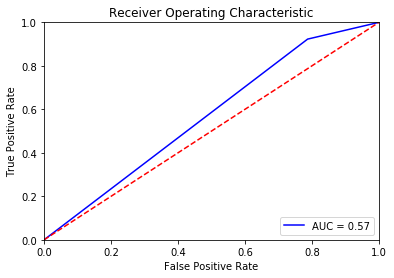

In [57]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_tree.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Random Forest

In [58]:
rf_grid_dc = {
    'n_estimators': [100,500,1000],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)


In [60]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=rf_grid_dc,
                       scoring ='accuracy',
                       cv=5)

In [61]:
rf_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [62]:
rf_grid.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}

In [63]:
rf_grid.best_score_

0.9427842828834481

In [64]:
joblib.dump(rf_grid.best_estimator_,path_base('modelo_rf_ontime_gridsearch.pkl','model'),compress=1)
modelo_treinado_rf = open(path_base('modelo_rf_ontime_gridsearch.pkl','model'),'rb')
model_rf = joblib.load(modelo_treinado_rf)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_rf_ontime_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_rf_ontime_gridsearch.pkl


In [65]:
model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [66]:
model_rf.predict(x_teste)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
y_rf_teste = model_rf.predict(x_teste)
acc_rf_teste = round(accuracy_score(y_rf_teste,y_teste)*100,2)
print('Teste: ',acc_rf_teste)

Teste:  94.71


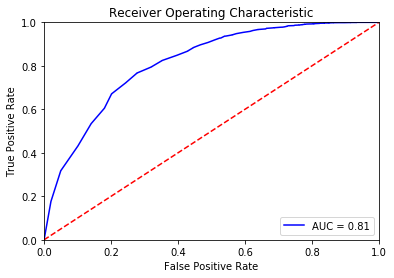

In [68]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_rf.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting

In [69]:
# dicionario
gb_grid_dc = {
    'min_samples_leaf': [1,10,20],
    'min_samples_split': [1.0,3,10],
    'max_depth': [1,5,12],
    'n_estimators': [10,50,200]
}

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2)


In [71]:
from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator=gb,
                      param_grid=gb_grid_dc,
                       cv=5)

In [72]:
gb_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...one,
             

In [73]:
gb_grid.best_params_

{'max_depth': 12,
 'min_samples_leaf': 20,
 'min_samples_split': 3,
 'n_estimators': 200}

In [74]:
gb_grid.best_score_

0.9405791808668569

In [75]:
joblib.dump(gb_grid.best_estimator_,path_base('modelo_gb_ontime_gridsearch.pkl','model'),compress=1)
modelo_treinado_gb = open(path_base('modelo_gb_ontime_gridsearch.pkl','model'),'rb')
model_gb = joblib.load(modelo_treinado_gb)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_gb_ontime_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_gb_ontime_gridsearch.pkl


In [76]:
model_gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
model_gb.predict(x_teste)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
y_gb_teste = model_gb.predict(x_teste)
acc_gb_teste = round(accuracy_score(y_gb_teste,y_teste)*100,2)
print('Teste: ',acc_gb_teste)

Teste:  94.41


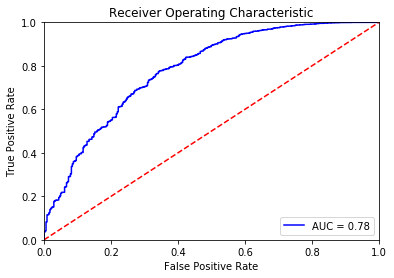

In [79]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_gb.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Neural

In [80]:
# dicionario
mlp_grid_dc = {
    'max_iter': [10,100],
    'tol': [0.00010,0.000010],
    'solver': ['adam'],
    'hidden_layer_sizes':[(50,50),(300)],
    'activation': ['relu']
}

In [81]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose = False,random_state=2)


In [82]:
from sklearn.model_selection import GridSearchCV
mlp_grid = GridSearchCV(estimator=mlp,
                      param_grid=mlp_grid_dc,
                       cv=5)

In [83]:
mlp_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=2, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'a

In [84]:
mlp_grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 300,
 'max_iter': 10,
 'solver': 'adam',
 'tol': 0.0001}

In [85]:
mlp_grid.best_score_

0.8887074497308636

In [86]:
from sklearn.externals import joblib
joblib.dump(mlp_grid.best_estimator_,path_base('modelo_mlp_ontime_gridsearch.pkl','model'),compress=1)
modelo_treinado_mlp = open(path_base('modelo_mlp_ontime_gridsearch.pkl','model'),'rb')
model_mlp = joblib.load(modelo_treinado_mlp)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_mlp_ontime_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_mlp_ontime_gridsearch.pkl


In [87]:
model_mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [88]:
model_mlp.predict(x_teste)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score
y_mlp_teste = model_mlp.predict(x_teste)
acc_mlp_teste = round(accuracy_score(y_mlp_teste,y_teste)*100,2)
print('Teste: ',acc_mlp_teste)

Teste:  93.51


# xgboost

In [90]:
# dicionario
xgbc_grid_dc = {
    'max_depth': [8],
    'learning_rate': [0.1],
    'n_estimators': [400,800],
    'colsample_bytree':[0.3,0.8],
    'reg_alpha': [2,5]
}

In [91]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [92]:
xgbc = xgb.XGBClassifier(objective='binary:logistic',booster='gbtree',n_jobs=2)

In [93]:
from sklearn.model_selection import GridSearchCV
xgbc_grid = GridSearchCV(estimator=xgbc,
                          param_grid=xgbc_grid_dc,
                           cv=5)

In [94]:
xgbc_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=2,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.8], 'learning_rate': [0.1],
                         'max_depth': [8], 'n_estimators': [400, 800],
                         

In [95]:
xgbc_grid.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 800,
 'reg_alpha': 2}

In [96]:
xgbc_grid.best_score_

0.9411593618716116

In [97]:
from sklearn.externals import joblib
joblib.dump(xgbc_grid.best_estimator_,path_base('modelo_xgbc_ontime_gridsearch.pkl','model'),compress=1)
modelo_treinado_xgbc = open(path_base('modelo_xgbc_ontime_gridsearch.pkl','model'),'rb')
model_xgbc = joblib.load(modelo_treinado_xgbc)

C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_xgbc_ontime_gridsearch.pkl
C:\MyGit\databricks_projetofinal_fia\notebook
C:\MyGit\databricks_projetofinal_fia\model
C:\MyGit\databricks_projetofinal_fia\model\modelo_xgbc_ontime_gridsearch.pkl


In [98]:
model_xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, n_estimators=800, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
model_xgbc.predict(x_teste)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score
y_xgbc_teste = model_xgbc.predict(x_teste)
acc_xgbc_teste = round(accuracy_score(y_xgbc_teste,y_teste)*100,2)
print('Teste: ',acc_xgbc_teste)

Teste:  94.52


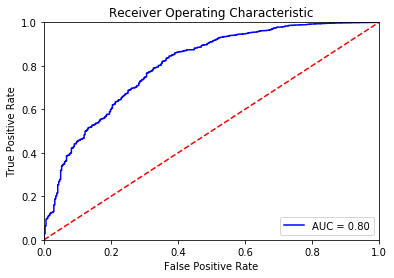

In [101]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_xgbc.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusão
<ul>
<li>Feito análise inicial com seleção de variáveis e grid search e algorítimo com melhor resultado foi
    Random Forest com accuracy média na base de treino 0.943 e de 94.71 na base de testes e com AUC = 0.81 </li>
</ul>
